**DT-RF-XGBOOST Inclass**

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_pickle("diabetes.pkl")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(707, 9)

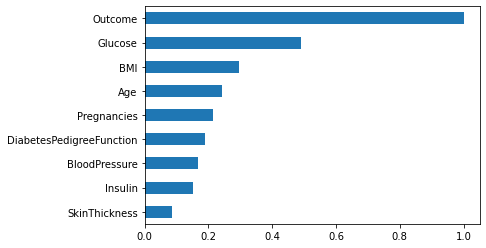

In [4]:
df.corr()["Outcome"].sort_values().plot.barh();

In [5]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

 > stratify=y parametresi konuldugunda y leri degerlerine gore test ve train samples a dengeli olarak dagitir.

In [6]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit (X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.03it/s]

[08:52:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.76,0.75,0.75,0.76,0.01
SVC,0.79,0.74,0.74,0.78,0.02
NuSVC,0.78,0.73,0.73,0.78,0.02
LogisticRegression,0.78,0.73,0.73,0.77,0.02
LinearSVC,0.77,0.72,0.72,0.77,0.03
LinearDiscriminantAnalysis,0.77,0.72,0.72,0.77,0.02
RandomForestClassifier,0.77,0.72,0.72,0.77,0.16
CalibratedClassifierCV,0.77,0.72,0.72,0.77,0.09
QuadraticDiscriminantAnalysis,0.76,0.72,0.72,0.76,0.01


### 1-Logistic Regression

In [7]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[82 12]
[19 29]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        94
           1       0.71      0.60      0.65        48

    accuracy                           0.78       142
   macro avg       0.76      0.74      0.75       142
weighted avg       0.78      0.78      0.78       142



### 2-K-NN Model

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[83 11]
[23 25]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        94
           1       0.69      0.52      0.60        48

    accuracy                           0.76       142
   macro avg       0.74      0.70      0.71       142
weighted avg       0.75      0.76      0.75       142



### 3-Decision Tree
* Decision Tree, 20-25 yil once modasi gecmis bir algoritma iken, Random Forest onu ayaga kaldirdi.
* Normalde bu model tercih edilen bir model degil.

In [13]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)

In [14]:
dt_model=DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[75 19]
[24 24]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        94
           1       0.56      0.50      0.53        48

    accuracy                           0.70       142
   macro avg       0.66      0.65      0.65       142
weighted avg       0.69      0.70      0.69       142



### 4-Random Forest

In [20]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[83 11]
[20 28]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        94
           1       0.72      0.58      0.64        48

    accuracy                           0.78       142
   macro avg       0.76      0.73      0.74       142
weighted avg       0.78      0.78      0.78       142



#### > RF Tunning

In [22]:
rf=RandomForestClassifier()

In [23]:
rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

* n_estimators=100 (default)
* decision tree 1 tree de sonuc buluyordu. burada [50, 100, 300] tree yap, bunlarin ortalamasini al dedik.
* 500, 1000 de listeye eklenebilir, ancak sure artar.

* max_depth, tree kac defa asagi gidecek, kac defa bolunecek
* defaultu None olanlara deger vermek genelde modelin sonuclarini kotulestirir.(richard Instructor)

* max_features,En iyi bölünmeyi ararken göz önünde bulundurulması gereken feature sayısıdir. defaultu number of featuresdur. 

* min_samples_split, bir node u bolmeden once gerekli olan minimum sample sayisidir. Bu sayiya dusunce split duruyor.

In [26]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 501 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   37.2s finished


In [27]:
rf_cv_model.best_params_

{'max_depth': 5,
 'max_features': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [43]:
rf_tuned = RandomForestClassifier(max_depth = 7,             
                                  max_features = 8, 
                                  min_samples_split = 3, 
                                  n_estimators = 1000).fit(X_train, y_train)

In [44]:
y_pred = rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[83, 11],
       [20, 28]], dtype=int64)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        94
           1       0.72      0.58      0.64        48

    accuracy                           0.78       142
   macro avg       0.76      0.73      0.74       142
weighted avg       0.78      0.78      0.78       142



In [46]:
rf_tuned

RandomForestClassifier(max_depth=7, max_features=8, min_samples_split=3,
                       n_estimators=1000)

#### > Feature Importance

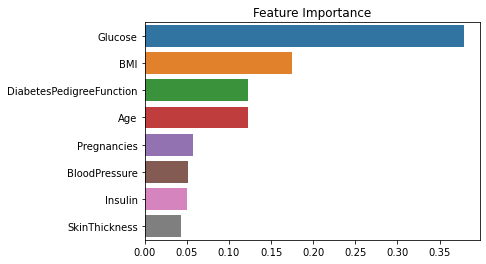

In [47]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

### 5-XGBOOST
* XGBoost, decison-tree (karar-agaci) temelli ve gradient-boosting (egim-artirmali) bir ML sistemi. 
* Eger elinizdeki veri, kucuk-orta buyuklukte ve tablo verisi ise adresiniz decision-tree temelli algoritmalar. Bu algoritmalarin yukselen yildizi ise XGBoost
* Eger verileriniz, resim/yazi/ses gibi yapisal olmayan veriler ise yapay sinir aglari ile derin ogrenme dogru secim olacaktir.

In [50]:
# pip install xgboost

In [51]:
from xgboost import XGBClassifier

In [52]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [53]:
y_pred = xgb_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[76, 18],
       [23, 25]], dtype=int64)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        94
           1       0.58      0.52      0.55        48

    accuracy                           0.71       142
   macro avg       0.67      0.66      0.67       142
weighted avg       0.70      0.71      0.71       142



#### > Tunning XGBOOST

In [81]:
xgb = XGBClassifier()

In [82]:
xgb_params = {"n_estimators": [50, 100, 300,500],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

* "n_estimators": 100 (default),[50, 100, 300] tree yap, bunlarin kendi icinde ortalamasini al, en iyi olani ver.
* "subsample":0 ile 1 arasi olmasi biasi onler. fitting yaparken samples in fit edilme yuzdesi
* "max_depth":[3,5,7], tree kac defa asagi gidecek, kac defa bolunecek
* "learning_rate": ogrenme hizi, default 0.1

In [83]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   21.0s finished


In [85]:
xgb_cv_model.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1}

In [86]:
xgb_tuned = XGBClassifier(learning_rate= 0.3, 
                                max_depth= 5, 
                                n_estimators= 300, 
                                subsample= 1).fit(X_train, y_train)

In [87]:
y_pred = xgb_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[77, 17],
       [25, 23]], dtype=int64)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79        94
           1       0.57      0.48      0.52        48

    accuracy                           0.70       142
   macro avg       0.66      0.65      0.65       142
weighted avg       0.69      0.70      0.70       142



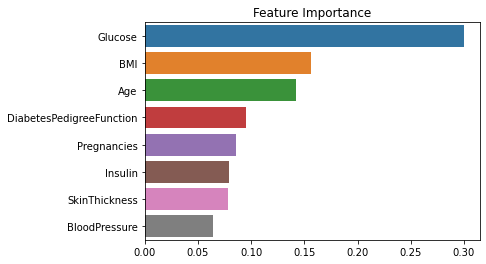

In [66]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()